In [ ]:
# if you run this and get any errors, it might mean that packages are not installed command out pip install and install all the packeges.

!pip install pandas
!pip install numpy
!pip install numpy
!pip install matplotlib
!pip install statsmodels
!pip install scipy
!pip install git+https://github.com/science64/DynaTMT-py-SB.git
!pip install --upgrade "git+https://github.com/science64/DynaTMT-py-SB.git" # This is my repository (Süleyman) that I am updating!
!pip install pathos --user
# Current version: 2.8.5 (2024-02-06)

In [ ]:
!pip list  # make sure DynaTMT-py-SB      2.8.5 version number, otherwise try to install again!

'''
If you cannot upgrade it use console/terminal or
uninstall first ==>
!pip uninstall DynaTMT-py-SB
and install it back ==>
!pip install git+https://github.com/science64/DynaTMT-py-SB.git
'''

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import warnings
from statsmodels.stats.multitest import multipletests, local_fdr
from scipy.stats import zscore, uniform
import matplotlib.pyplot as plt
import DynaTMT_SB.DynaTMT as mePROD
import PBLMM as statisticsGetter
#import mssuite.mssuite as ms

warnings.filterwarnings("ignore")

In [2]:
wd = "Example data" # you can define your folder here etc: C://Users/Jasmin/Desktop/JS55/fractionation/
dataName = "20200724_SB_CCCP+ISRIB_Import_PSMs.txt"

psms = pd.read_csv(f'{wd}/{dataName}', sep='\t', header=0) # TEXT or CSV file: you provide your .txt PSM or peptide file here.

# psms = pd.read_excel(f'{wd}/{dataName}', sep='\t', header=0) #  EXCEL file: you provide your .xlsx  PSM or peptide file here.

# print(psms.dtypes)

# you can now add 'peptides file' as well if you do not want to IT adjustment!, just import here!

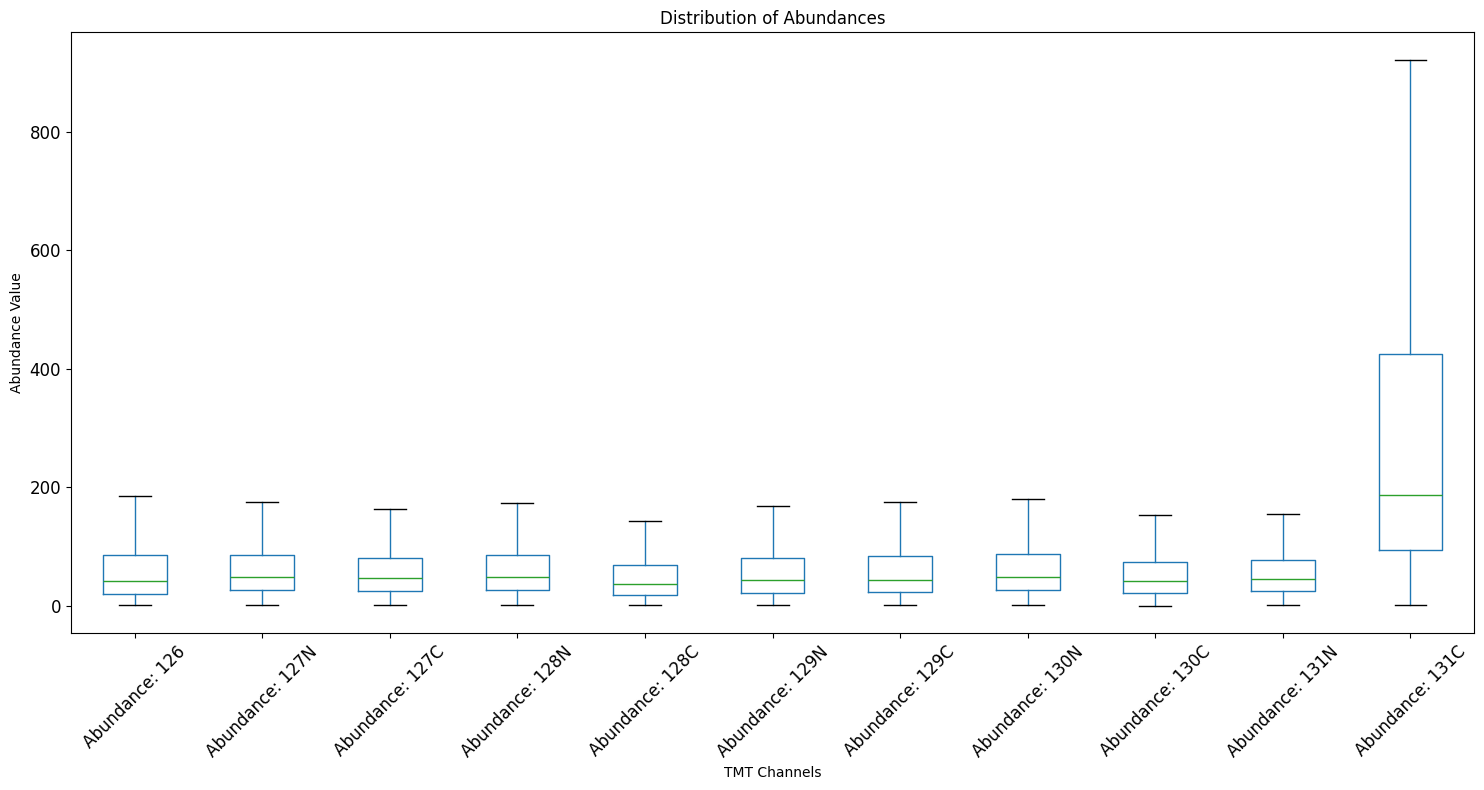

In [3]:
# to have a look your data how it is looking!

# channels this is provide columsn which has the abundances columns only from 'psms' data
# change accordingly for other files if needed!
channels = [col for col in psms.columns
            if 'abundance' in col.lower() and 'normaliz' not in col.lower()]

print('psms: %s rows x %s columns' % (psms.shape[0], psms.shape[1]))

abundance_df = psms[channels]

# Displaying the first few rows of the extracted abundance columns
abundance_df.head()

# Plotting the abundance columns using a boxplot
plt.figure(figsize=(15, 8))
abundance_df.boxplot(grid=False, vert=True, fontsize=12, rot=45, showfliers=False)
plt.title("Distribution of Abundances")
plt.ylabel("Abundance Value")
plt.xlabel("TMT Channels")
plt.tight_layout()
plt.show()

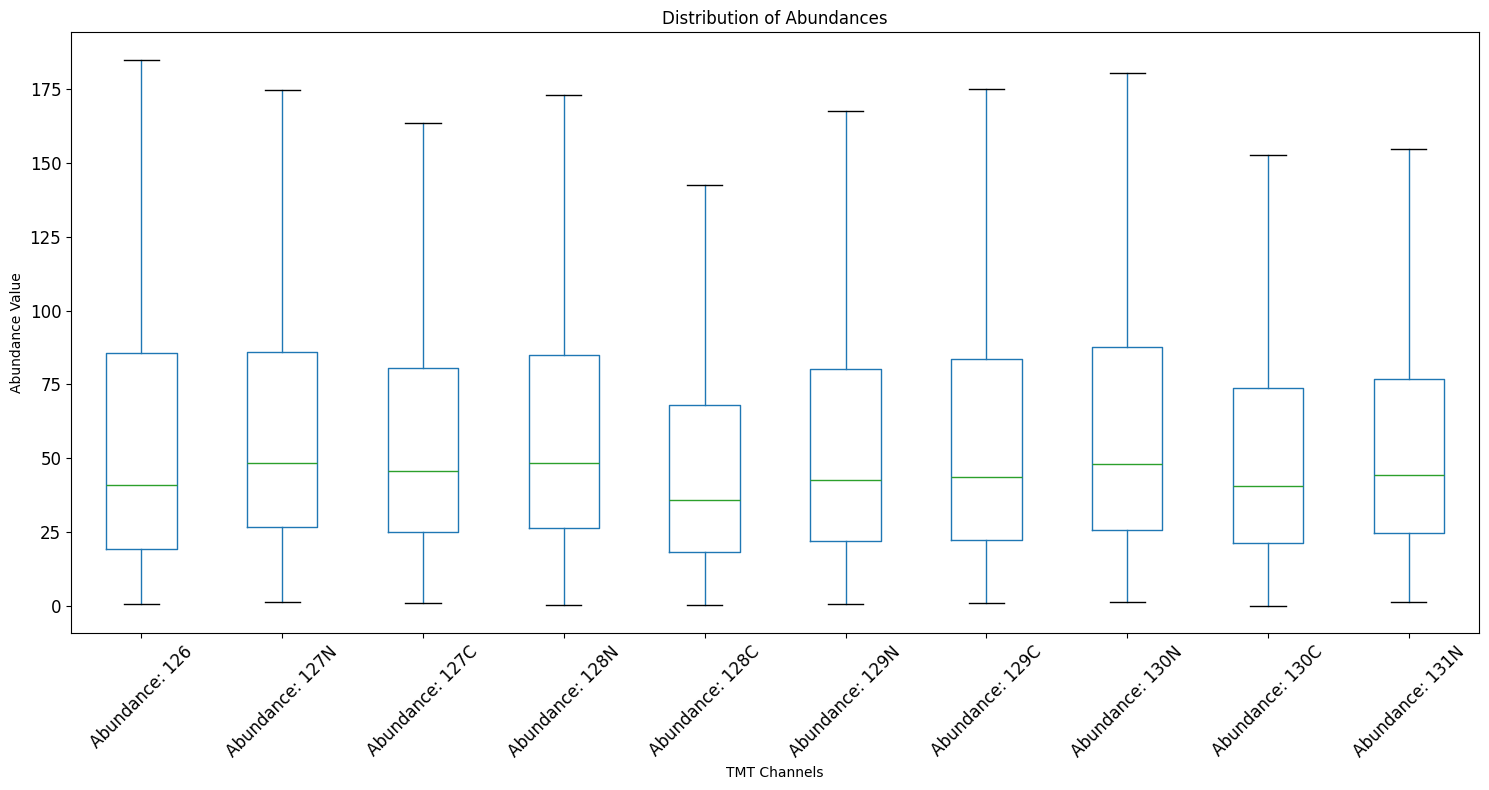

In [4]:
# if you want to remove your booster
# In my experiment it is last channel 'Abundance: 131C' you need to find your column to remove it.

boster_removed = psms.drop('Abundance: 131C', axis = True)

print('boster_removed: %s rows x %s columns' % (boster_removed.shape[0], boster_removed.shape[1]))

# after booster is removed!

channels = [col for col in boster_removed.columns
            if 'abundance' in col.lower() and 'normaliz' not in col.lower()]

abundance_df = boster_removed[channels]

# Displaying the first few rows of the extracted abundance columns
abundance_df.head()

# Plotting the abundance columns using a boxplot
plt.figure(figsize=(15, 8))
abundance_df.boxplot(grid=False, vert=True, fontsize=12, rot=45, showfliers=False)
plt.title("Distribution of Abundances")
plt.ylabel("Abundance Value")
plt.xlabel("TMT Channels")
plt.tight_layout()
plt.show()

Calling function: IT_adjustment


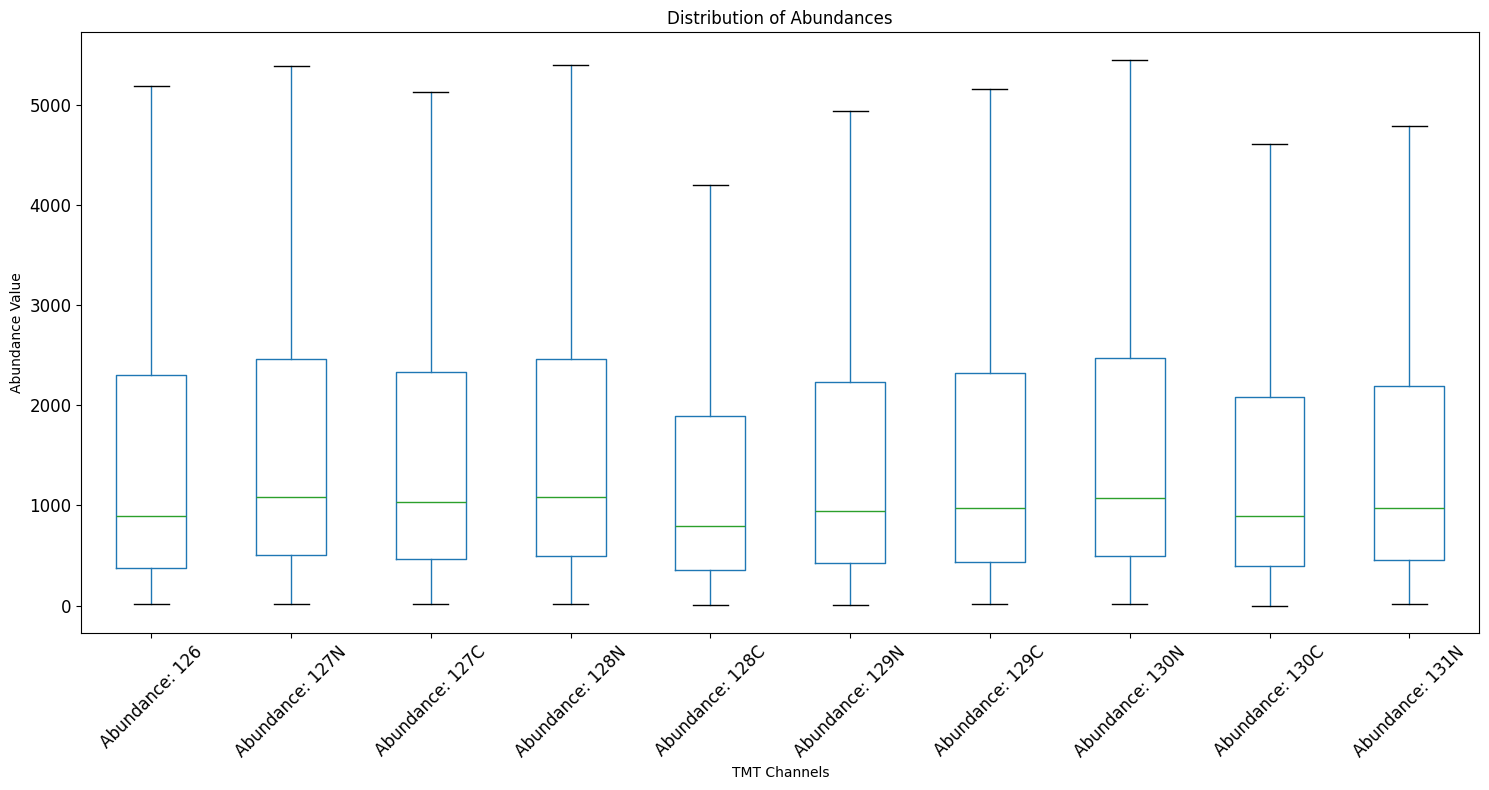

In [5]:
# initiate your date here with PD_input class, if your data name is 'boster_removed'

process = mePROD.PD_input(boster_removed)

# IT adjusment,
IT_adjusted = process.IT_adjustment(boster_removed)

print('IT_adjusted: %s rows x %s columns' % (IT_adjusted.shape[0], IT_adjusted.shape[1]))

channels = [col for col in IT_adjusted.columns
            if 'abundance' in col.lower() and 'normaliz' not in col.lower()]

abundance_df = IT_adjusted[channels]

# Displaying the first few rows of the extracted abundance columns
abundance_df.head()

# Plotting the abundance columns using a boxplot
plt.figure(figsize=(15, 8))
abundance_df.boxplot(grid=False, vert=True, fontsize=12, rot=45, showfliers=False)
plt.title("Distribution of Abundances")
plt.ylabel("Abundance Value")
plt.xlabel("TMT Channels")
plt.tight_layout()
plt.show()

In [1]:
# it will filter peptides (PSMs) which contains empty values (complete empty values for entire TMT channels), contaminations and shared peptides (which contains ; in them).


# filter_data = process.filter_peptides(IT_adjusted) # if you have peptide file input

filter_data = process.filter_PSMs(IT_adjusted) # if you have PSMs file input

print('filter_data: %s rows x %s columns' % (filter_data.shape[0], filter_data.shape[1]))

channels = [col for col in filter_data.columns
            if 'abundance' in col.lower() and 'normaliz' not in col.lower()]

abundance_df = filter_data[channels]

# Displaying the first few rows of the extracted abundance columns
abundance_df.head()

# Plotting the abundance columns using a boxplot
plt.figure(figsize=(15, 8))
abundance_df.boxplot(grid=False, vert=True, fontsize=12, rot=45, showfliers=False)
plt.title("Distribution of Abundances")
plt.ylabel("Abundance Value")
plt.xlabel("TMT Channels")
plt.tight_layout()
plt.show()

NameError: name 'process' is not defined

Calling function: total_intensity_normalisation


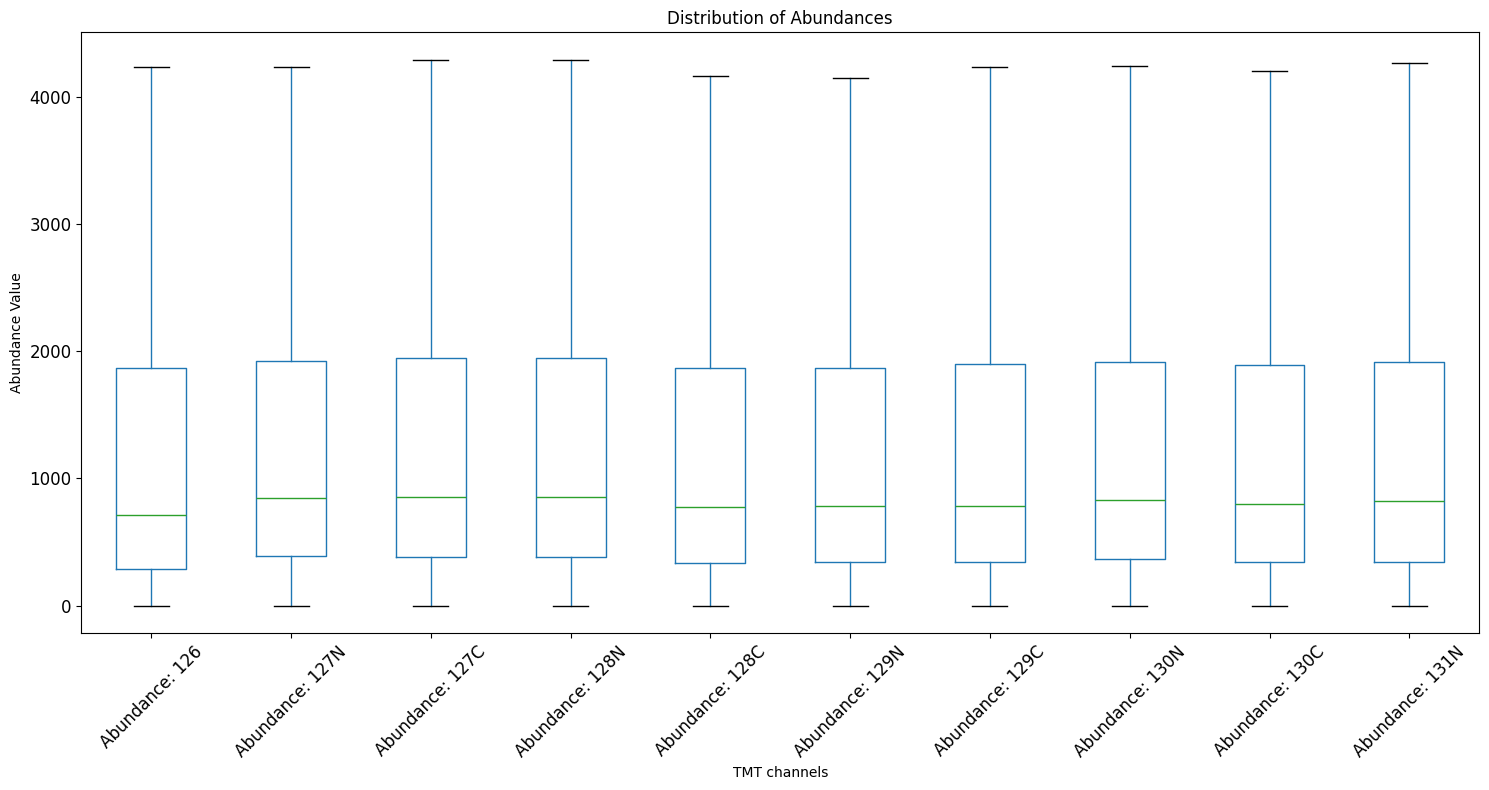

In [7]:
# for total intenstiy normalization
sumNorm = process.total_intensity_normalisation(filter_data)

print('sumNorm: %s rows x %s columns' % (sumNorm.shape[0], sumNorm.shape[1]))

channels = [col for col in sumNorm.columns
            if 'abundance' in col.lower() and 'normaliz' not in col.lower()]

abundance_df = sumNorm[channels]

# Displaying the first few rows of the extracted abundance columns
abundance_df.head()

# Plotting the abundance columns using a boxplot
plt.figure(figsize=(15, 8))
abundance_df.boxplot(grid=False, vert=True, fontsize=12, rot=45, showfliers=False)
plt.title("Distribution of Abundances")
plt.ylabel("Abundance Value")
plt.xlabel("TMT channels")
plt.tight_layout()
plt.show()

Calling function: Median_normalisation


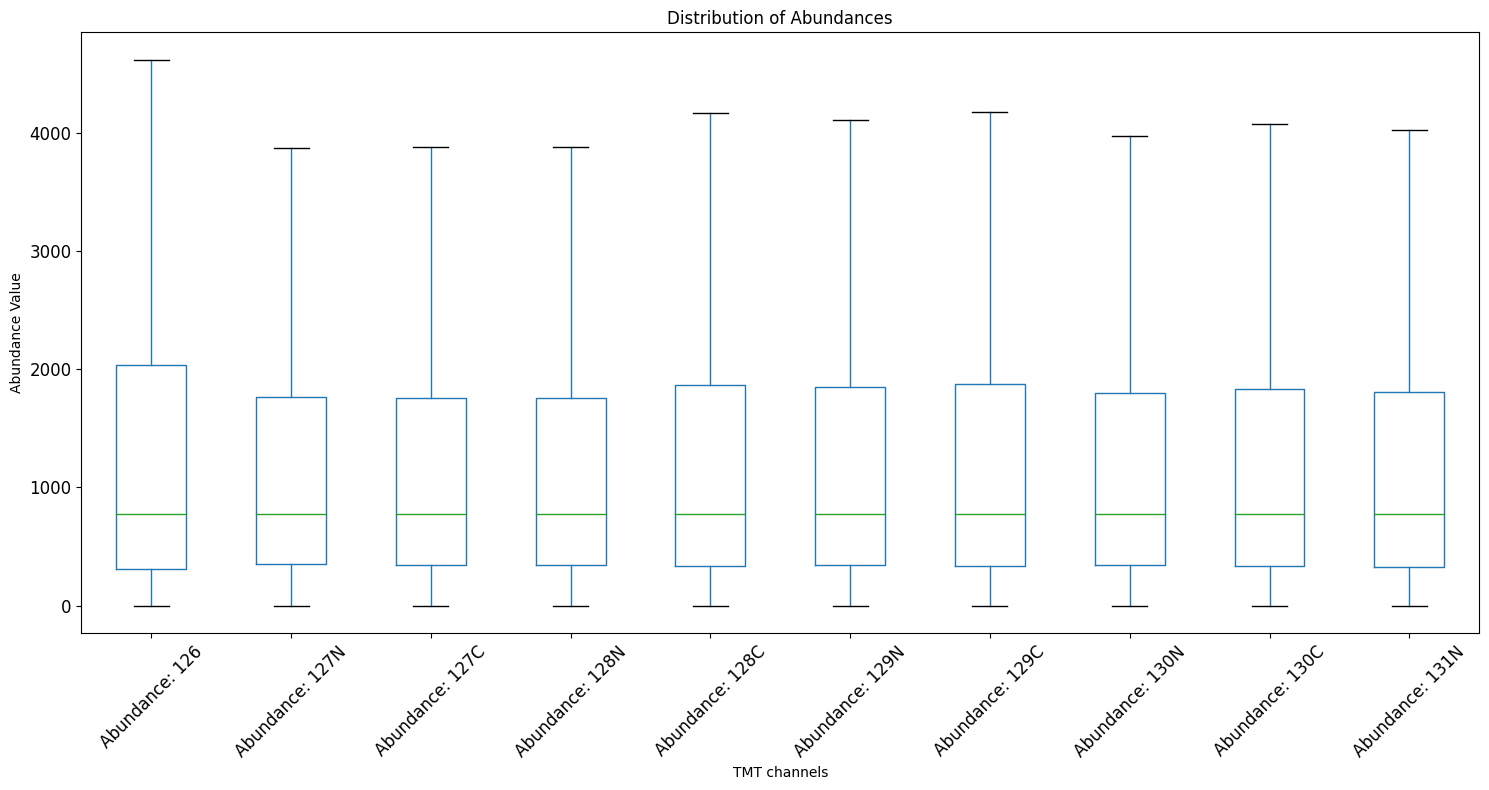

In [10]:
# for Median intenstiy normalization
medianNorm = process.Median_normalisation(filter_data)

print('medianNorm: %s rows x %s columns' % (medianNorm.shape[0], medianNorm.shape[1]))

channels = [col for col in medianNorm.columns
            if 'abundance' in col.lower() and 'normaliz' not in col.lower()]

abundance_df = medianNorm[channels]

# Displaying the first few rows of the extracted abundance columns
abundance_df.head()

# Plotting the abundance columns using a boxplot
plt.figure(figsize=(15, 8))
abundance_df.boxplot(grid=False, vert=True, fontsize=12, rot=45, showfliers=False)
plt.title("Distribution of Abundances")
plt.ylabel("Abundance Value")
plt.xlabel("TMT channels")
plt.tight_layout()
plt.show()

Calling function: TMM
Normalization


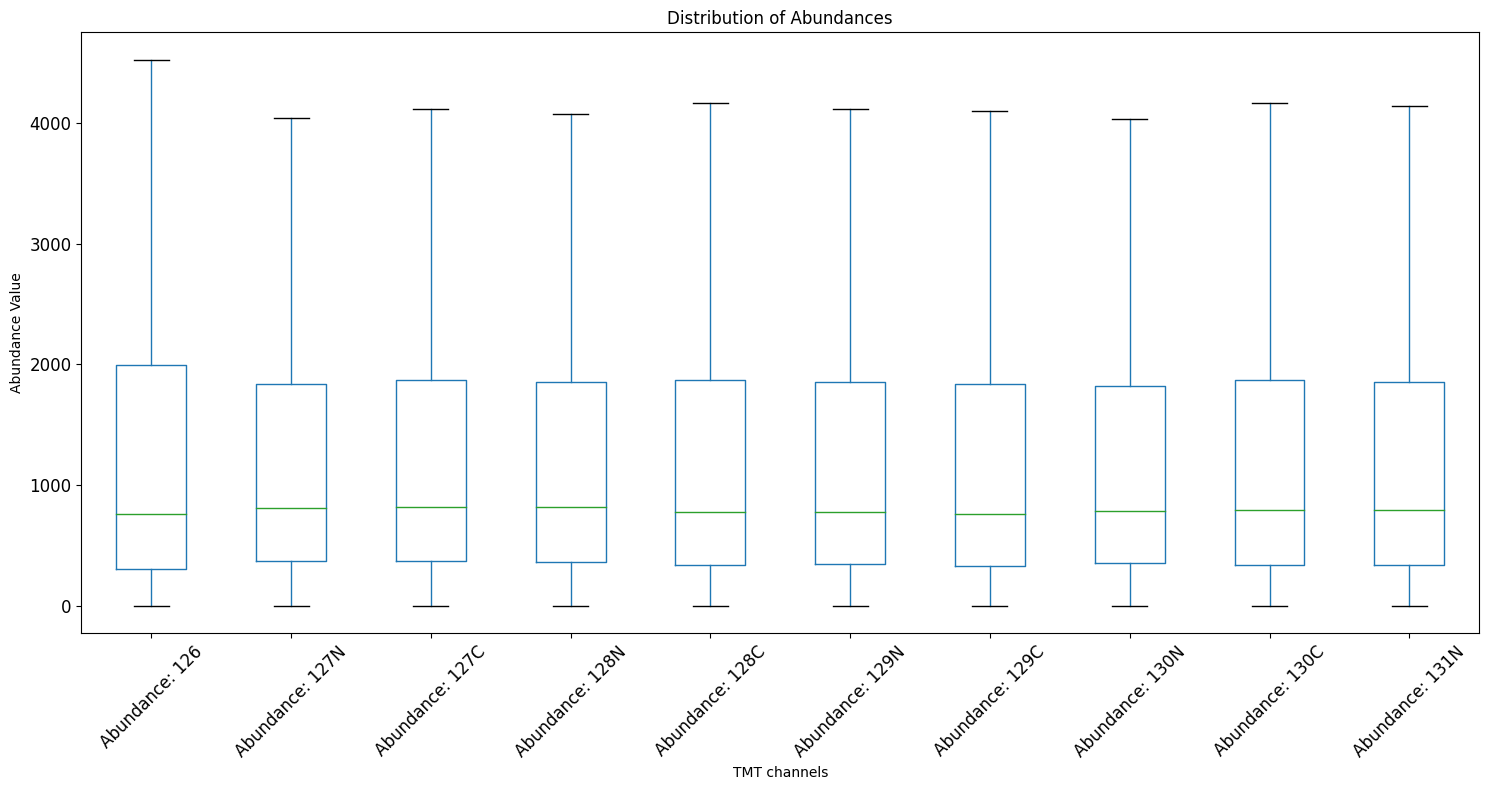

In [11]:
# for total TMM normalization (The Trimmed Mean of the M-values)
TMM_Norm = process.TMM(filter_data)

print('TMM_Norm: %s rows x %s columns' % (TMM_Norm.shape[0], TMM_Norm.shape[1]))

channels = [col for col in TMM_Norm.columns
            if 'abundance' in col.lower() and 'normaliz' not in col.lower()]

abundance_df = TMM_Norm[channels]

# Displaying the first few rows of the extracted abundance columns
abundance_df.head()

# Plotting the abundance columns using a boxplot
plt.figure(figsize=(15, 8))
abundance_df.boxplot(grid=False, vert=True, fontsize=12, rot=45, showfliers=False)
plt.title("Distribution of Abundances")
plt.ylabel("Abundance Value")
plt.xlabel("TMT channels")
plt.tight_layout()
plt.show()

Calling function: extract_heavy
Extraction Done Extracted Heavy PSMs/Peptides: 77953


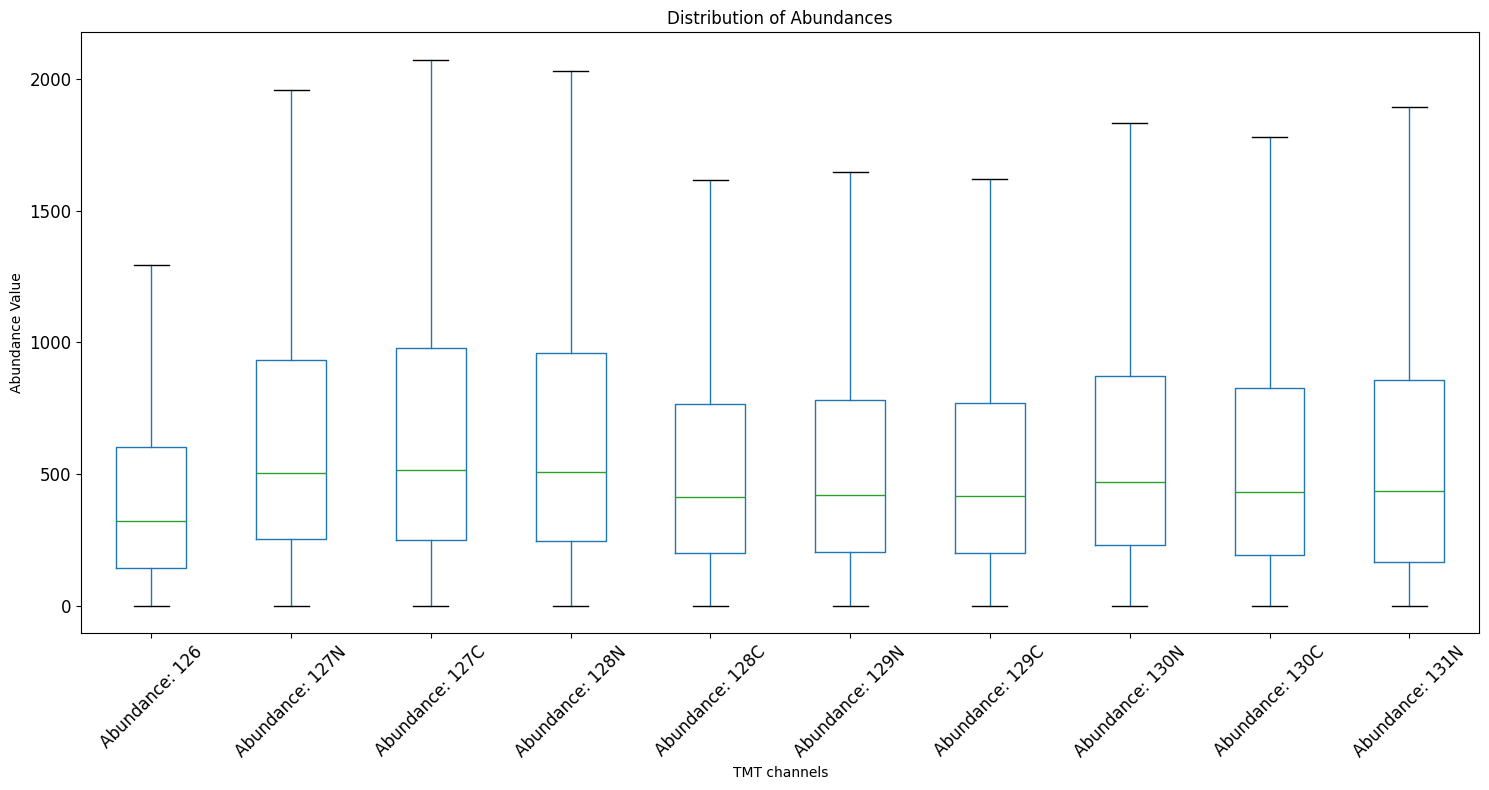

In [8]:
# extract heavy PSMs/peptides
heavy = process.extract_heavy(sumNorm) # sumNorm is your final normalized data, 
                                       # if you dont do it, please change what is the final data
print('heavy: %s rows x %s columns' % (heavy.shape[0], heavy.shape[1]))

channels = [col for col in heavy.columns
            if 'abundance' in col.lower() and 'normaliz' not in col.lower()]

abundance_df = heavy[channels]

# Displaying the first few rows of the extracted abundance columns
abundance_df.head()

# Plotting the abundance columns using a boxplot
plt.figure(figsize=(15, 8))
abundance_df.boxplot(grid=False, vert=True, fontsize=12, rot=45, showfliers=False)
plt.title("Distribution of Abundances")
plt.ylabel("Abundance Value")
plt.xlabel("TMT channels")
plt.tight_layout()
plt.show()

Calling function: extract_light
Extraction Done Extracted Light PSMs/Peptides: 99645


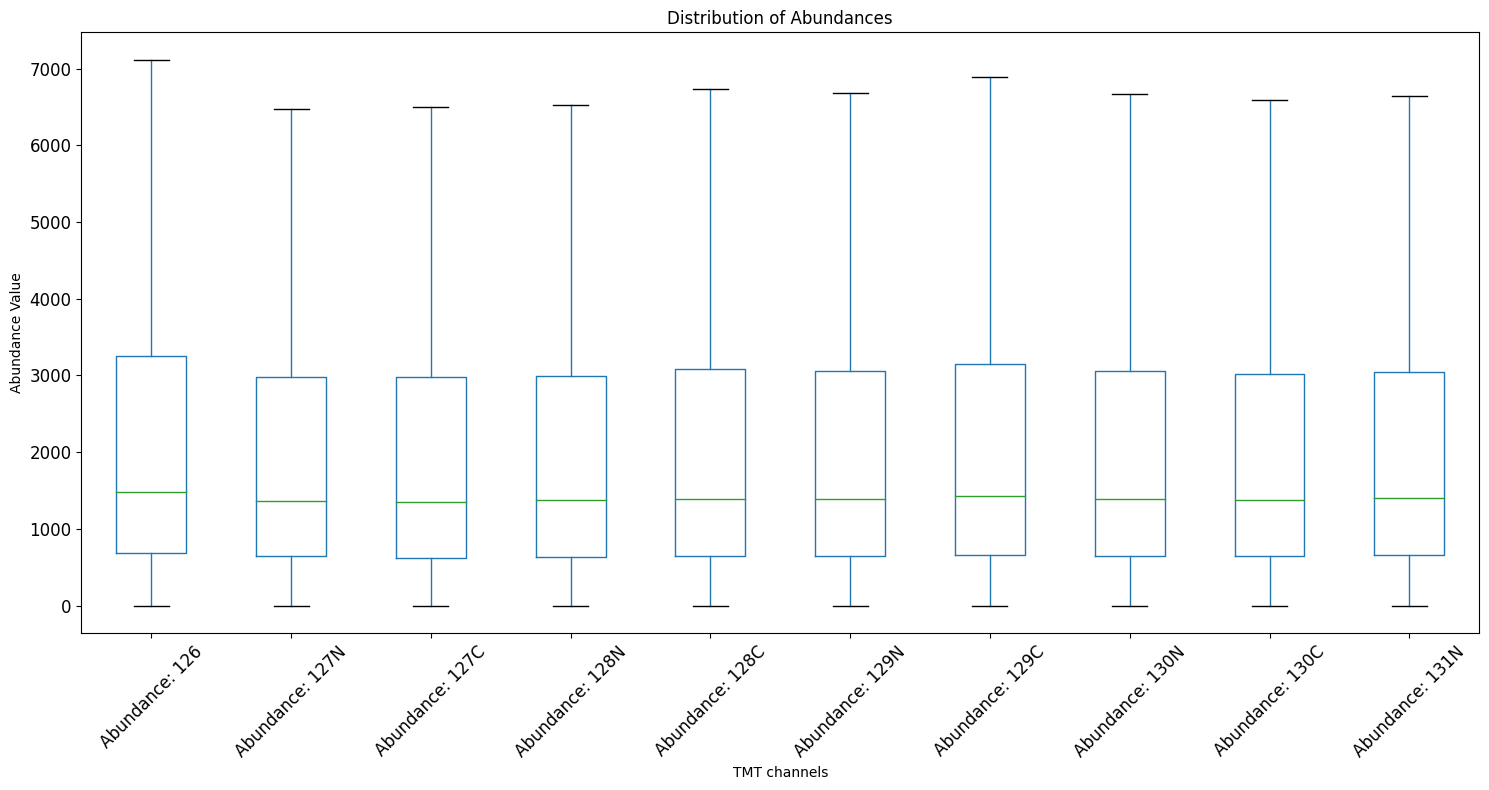

In [13]:
# extract light PSMs/peptides
light = process.extract_light(sumNorm) # sumNorm is your final normalized data, 
                                       # if you dont do it, please change what is the final data

print('light: %s rows x %s columns' % (light.shape[0], light.shape[1]))

channels = [col for col in light.columns
            if 'abundance' in col.lower() and 'normaliz' not in col.lower()]

abundance_df = light[channels]

# Displaying the first few rows of the extracted abundance columns
abundance_df.head()

# Plotting the abundance columns using a boxplot
plt.figure(figsize=(15, 8))
abundance_df.boxplot(grid=False, vert=True, fontsize=12, rot=45, showfliers=False)
plt.title("Distribution of Abundances")
plt.ylabel("Abundance Value")
plt.xlabel("TMT channels")
plt.tight_layout()
plt.show()

Calling function: baseline_correction


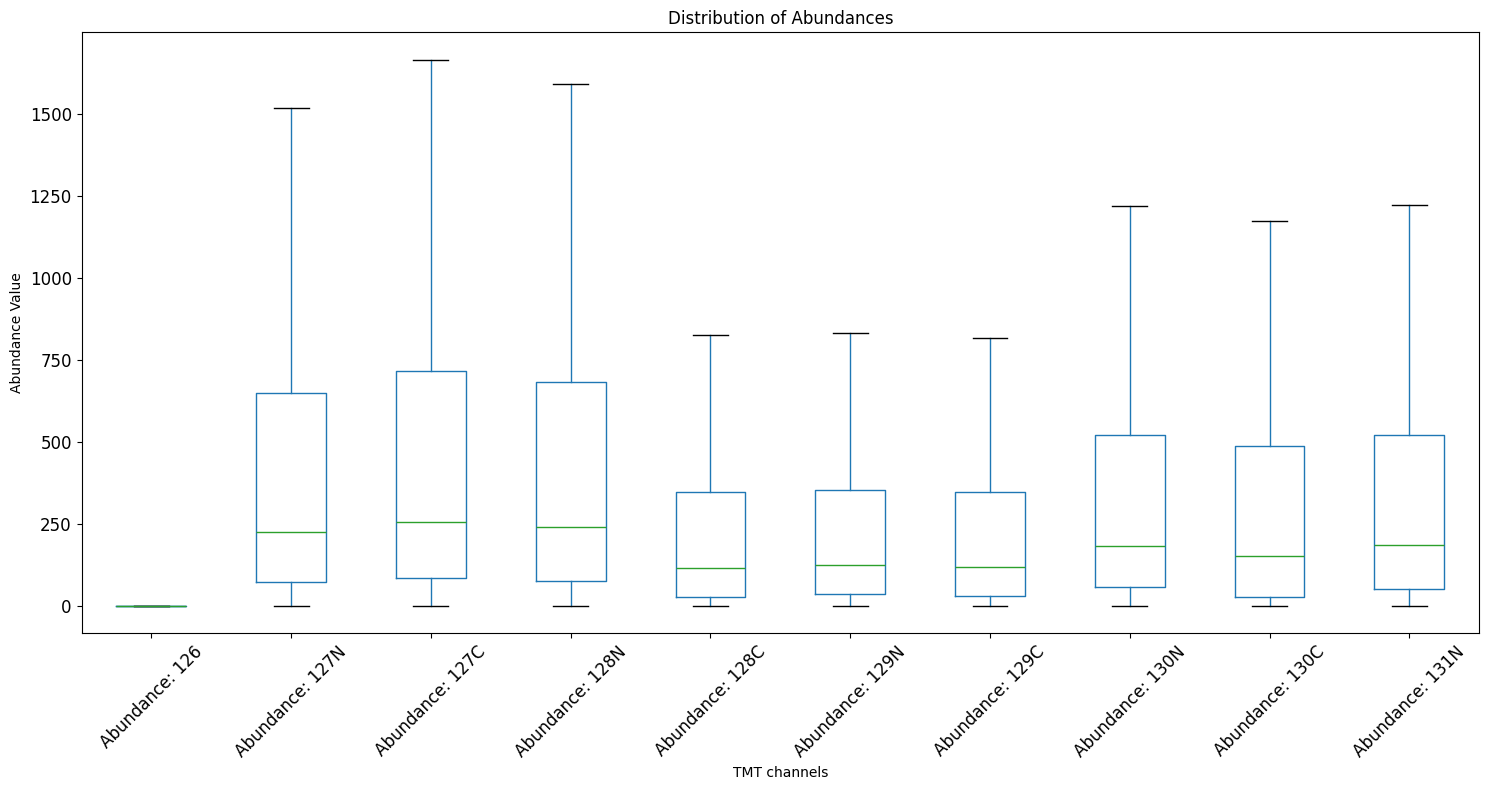

In [9]:
# if it is PSMs it will combine all the PSMs at the end into peptides
# if it is peptides, it will directly export as peptides
# please provide your baseline correction location if it is 1st column 126 for example you can keep as it is which is '0'
# and provide your empirical threshold which is 5 in default, you can increase it to reduce false.
# random is True set in default, if you want to set negative and 0 values to random values between 0 to 1.

peptide_data = process.baseline_correction(heavy, threshold=5, i_baseline=0, random=True)

print('peptide_data: %s rows x %s columns' % (peptide_data.shape[0], peptide_data.shape[1]))

channels = [col for col in peptide_data.columns
            if 'abundance' in col.lower() and 'normaliz' not in col.lower()]

abundance_df = peptide_data[channels]

# Displaying the first few rows of the extracted abundance columns
abundance_df.head()

# Plotting the abundance columns using a boxplot
plt.figure(figsize=(15, 8))
abundance_df.boxplot(grid=False, vert=True, fontsize=12, rot=45, showfliers=False)
plt.title("Distribution of Abundances")
plt.ylabel("Abundance Value")
plt.xlabel("TMT channels")
plt.tight_layout()
plt.show()

Calling function: protein_rollup


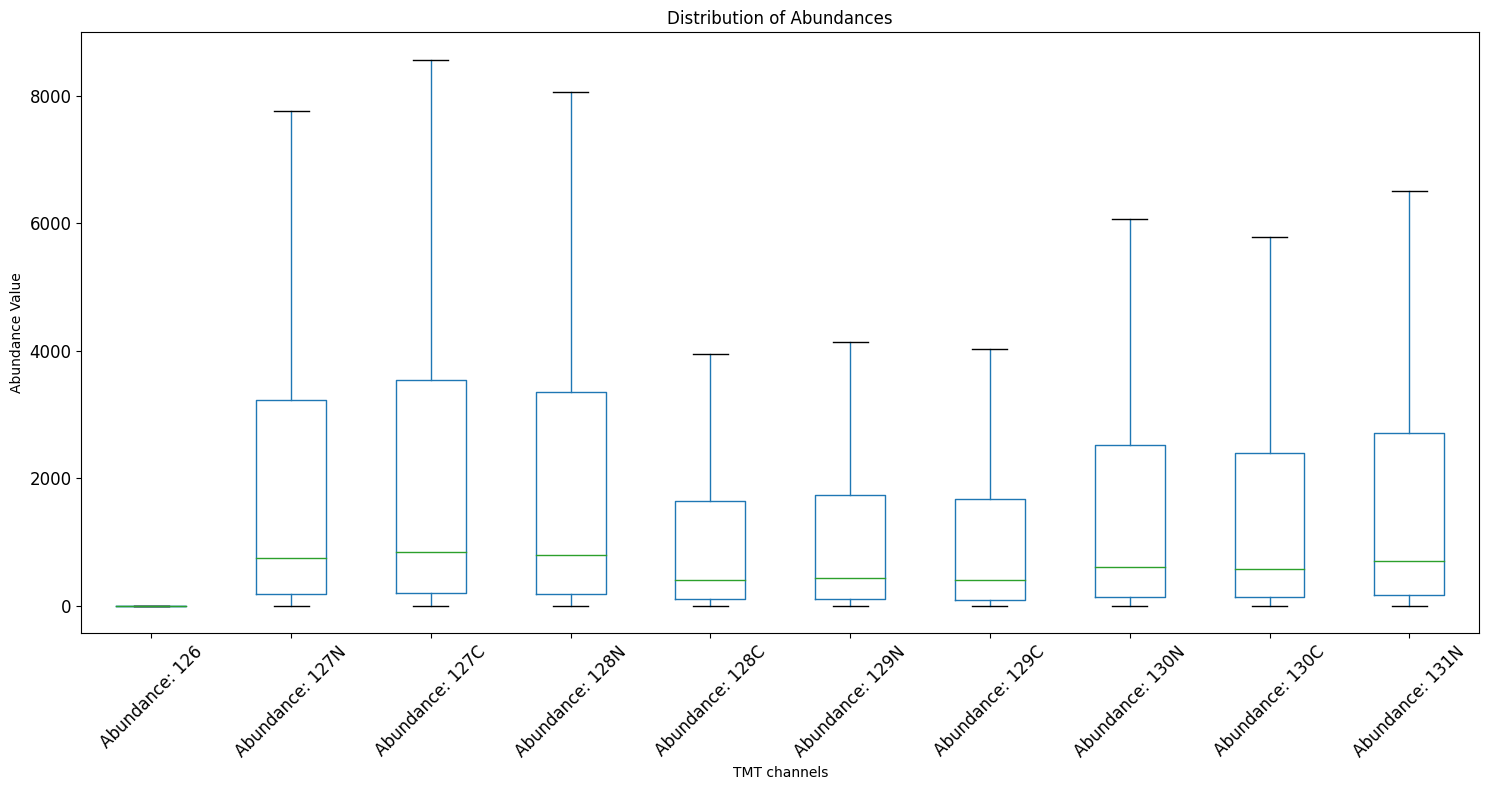

In [15]:
# if you do not want to use any statistical test or LMM at this point.
# you can combine into proteins and do your own statistical test.

# peptide_data from earlier which is baseline corrected and peptide output. Now we need to roll up into protein file.

protein_data = process.protein_rollup(peptide_data, method='sum') # there are other methods as well, we are now using 'sum' 
                                                          # additionally you can use 'mean' and 'median' as well.

print('protein_data: %s rows x %s columns' % (protein_data.shape[0], protein_data.shape[1]))


channels = [col for col in protein_data.columns
            if 'abundance' in col.lower() and 'normaliz' not in col.lower()]

abundance_df = protein_data[channels]

# Displaying the first few rows of the extracted abundance columns
abundance_df.head()

# Plotting the abundance columns using a boxplot
plt.figure(figsize=(15, 8))
abundance_df.boxplot(grid=False, vert=True, fontsize=12, rot=45, showfliers=False)
plt.title("Distribution of Abundances")
plt.ylabel("Abundance Value")
plt.xlabel("TMT channels")
plt.tight_layout()
plt.show()


In [16]:
# now you can export 'protein_data' into excel file if you want.
# or continue with next LMM part!

outputName = 'SB_CCCP+ISRIB_Import_Protein_mePROD_15.01.2023.xlsx' # provide your export name
protein_data.to_excel(f"{wd}/{outputName}", engine="openpyxl")

In [10]:
%%time
conditions = ['Light', 'DMSO', 'DMSO', 'DMSO', 'CCCP', 'CCCP', 'CCCP', 'CCCP_ISRIB', 'CCCP_ISRIB', 'CCCP_ISRIB']
pairs = [['CCCP', 'DMSO'], ['CCCP_ISRIB', 'DMSO'], ['CCCP_ISRIB', 'CCCP']]
hypo = statisticsGetter.HypothesisTesting()
resultFinal = hypo.peptide_based_lmm(peptide_data,conditions=conditions,pairs=pairs)
resultFinal.reset_index(inplace=True)
resultFinal.rename(columns={'index': 'Accession'}, inplace=True)
resultFinal.to_excel('Result_LMM_2024_peptides_Notmultiproessing.xlsx', index=False, engine="openpyxl")

print('resultFinal: %s rows x %s columns' % (resultFinal.shape[0], resultFinal.shape[1]))

No Normalization applied
Calculate Protein quantifications from PSM
Combination done
Total Number of Datapoints:  344880
['CCCP', 'DMSO'] and decision: -1
['CCCP_ISRIB', 'DMSO'] and decision: -1
['CCCP_ISRIB', 'CCCP'] and decision: 1
CPU times: total: 16min 20s
Wall time: 17min 3s


In [12]:
%%time
from pathos.multiprocessing import ProcessingPool as Pool
import numpy as np

def process_chunk(chunk, conditions, pairs):
    import PBLMM as statisticsGetter
    result = statisticsGetter.HypothesisTesting().peptide_based_lmm(chunk, conditions, pairs=pairs)
    return result

def parallelize_dataframe(df, func, conditions, pairs):
    num_cores = 4
    df_split = np.array_split(df, num_cores)
    
    # Use a lambda function to pass the additional arguments to process_chunk
    func_with_args = lambda chunk: func(chunk, conditions, pairs)
    
    pool = Pool(num_cores)
    results = pool.map(func_with_args, df_split)
    pool.close()
    pool.join()

    # Rebuild the dataframe from the results
    concatenated = pd.concat(results, axis=0)
    
    return concatenated


conditions = ['Light', 'DMSO', 'DMSO', 'DMSO', 'CCCP', 'CCCP', 'CCCP', 'CCCP_ISRIB', 'CCCP_ISRIB', 'CCCP_ISRIB']
pairs = [['CCCP', 'DMSO'], ['CCCP_ISRIB', 'DMSO'], ['CCCP_ISRIB', 'CCCP']]

# Apply the function in parallel
resultFinal = parallelize_dataframe(peptide_data, process_chunk, conditions, pairs)
resultFinal.reset_index(inplace=True)
resultFinal.rename(columns={'index': 'Accession'}, inplace=True)
resultFinal.to_excel('Result_LMM_2023_multiproessing_191224.xlsx', index=False, engine="openpyxl")

# 8 CPU core CPU times: total: 2.27 s
# Wall time: 5min 49s

# 12 CPU core 
# CPU times: total: 2.75 s
# Wall time: 4min 24s

CPU times: total: 5.2 s
Wall time: 8min 55s
